In [1]:
import numpy as np
print("numpy.version=" + np.__version__)
import pandas as pd
print("pandas.version=" + pd.__version__)
import sklearn as sk
print("sklearn.version=" + sk.__version__)
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.model_selection import KFold # 交差検証法に関する関数
from sklearn.linear_model import Ridge,Lasso,ElasticNet #正則化項付き最小二乗法を行うためのライブラリ
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
print("matplotlib.version=" + mpl.__version__)
import seaborn as sns
print("seaborn.version=" + sns.__version__)
import pydotplus
import graphviz
print("graphviz.version=" + graphviz.__version__)
import tensorflow as tf
print("tensorflow.version=" + tf.__version__)
import keras
print("keras.version=" + keras.__version__)

numpy.version=1.15.2
pandas.version=0.23.4
sklearn.version=0.19.1
matplotlib.version=3.0.0
seaborn.version=0.9.0
graphviz.version=0.8.4


C:\Users\nashi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


tensorflow.version=1.11.0
keras.version=2.2.4


Using TensorFlow backend.


## データの読み込み

In [2]:
dfgus = pd.read_excel("measurements2.xlsx")
dfgus.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [3]:
dfgus

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


## データの確認

In [4]:
print('dataframeの行数・列数の確認\n', dfgus.shape)
print("\n")
print('indexの確認\n', dfgus.index)
print("\n")
print('columnの確認\n', dfgus.columns)
print("\n")
print('dataframeの各列のデータ型を確認\n', dfgus.dtypes)

dataframeの行数・列数の確認
 (388, 12)


indexの確認
 RangeIndex(start=0, stop=388, step=1)


columnの確認
 Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')


dataframeの各列のデータ型を確認
 distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object


In [5]:
dfgus.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


## データ前処理

In [6]:
#欠損値確認
dfgus.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

### temp inside処理

In [7]:
dfgus.temp_inside.value_counts()

21.5    133
22.0    102
22.5     59
20.0     25
23.0     13
21.0     13
25.0     12
24.5      7
20.5      4
24.0      3
25.5      2
23.5      2
19.0      1
Name: temp_inside, dtype: int64

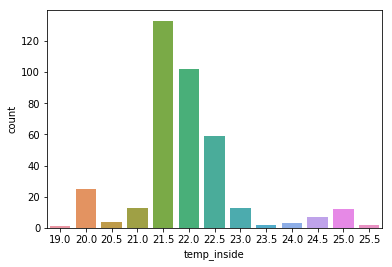

In [8]:
sns.countplot(x="temp_inside",data=dfgus)

In [9]:
print("tempinsitde平均値="+ str(dfgus.temp_inside.mean()))
print("tempinsitde中央値="+ str(dfgus.temp_inside.median()))

tempinsitde平均値=21.929521276595743
tempinsitde中央値=22.0


In [10]:
#temp_insideの欠損値を平均値で埋める
dfgus.temp_inside = dfgus.temp_inside.fillna(dfgus.temp_inside.mean())

### specials処理

In [11]:
dfgus.specials.unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [12]:
#名寄せ
dfgus['specials'] = dfgus['specials'].str.replace('sun ac', 'AC sun')
dfgus['specials'] = dfgus['specials'].str.replace('AC Sun', 'AC sun')
dfgus['specials'] = dfgus['specials'].str.replace('ac rain', 'AC rain')
dfgus['specials'] = dfgus['specials'].str.replace('ac', 'AC')

In [13]:
dfgus.specials.unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun'], dtype=object)

In [14]:
dfgus = pd.get_dummies(dfgus, dummy_na=True,columns=['specials'])
dfgus.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,specials_AC,specials_AC rain,specials_AC snow,specials_AC sun,specials_half rain half sun,specials_rain,specials_snow,specials_sun,specials_nan
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0,E10,0,0,0,0,0,0,0,0,1
1,12.0,4.2,30,21.5,13,E10,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1
2,11.2,5.5,38,21.5,15,E10,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1
3,12.9,3.9,36,21.5,14,E10,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1
4,18.5,4.5,46,21.5,15,E10,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1


### gas type処理

In [15]:
dfgus.gas_type.unique()

array(['E10', 'SP98'], dtype=object)

In [16]:
dfgus = pd.get_dummies(dfgus,columns=["gas_type"])
dfgus.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,refill gas,...,specials_AC rain,specials_AC snow,specials_AC sun,specials_half rain half sun,specials_rain,specials_snow,specials_sun,specials_nan,gas_type_E10,gas_type_SP98
0,28.0,5.0,26,21.5,12,0,0,0,45.0,E10,...,0,0,0,0,0,0,0,1,1,0
1,12.0,4.2,30,21.5,13,0,0,0,NaN,NaN,...,0,0,0,0,0,0,0,1,1,0
2,11.2,5.5,38,21.5,15,0,0,0,NaN,NaN,...,0,0,0,0,0,0,0,1,1,0
3,12.9,3.9,36,21.5,14,0,0,0,NaN,NaN,...,0,0,0,0,0,0,0,1,1,0
4,18.5,4.5,46,21.5,15,0,0,0,NaN,NaN,...,0,0,0,0,0,0,0,1,1,0


### refill liters処理

In [17]:
dfgus["refill liters"].unique()

array([45. ,  nan, 37.6, 37.7, 38. , 38.3, 10. , 39. , 41. , 37. , 37.2])

In [18]:
#ひとまず欠損値に0を置く
dfgus = dfgus.fillna({'refill liters': 0})

In [19]:
dfgus["refill liters"].unique()

array([45. ,  0. , 37.6, 37.7, 38. , 38.3, 10. , 39. , 41. , 37. , 37.2])

### refill gas処理

In [20]:
dfgus["refill gas"].unique()

array(['E10', nan, 'SP98'], dtype=object)

In [21]:
dfgus = pd.get_dummies(dfgus, dummy_na=True,columns=['refill gas'])
dfgus.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,specials_AC,...,specials_half rain half sun,specials_rain,specials_snow,specials_sun,specials_nan,gas_type_E10,gas_type_SP98,refill gas_E10,refill gas_SP98,refill gas_nan
0,28.0,5.0,26,21.5,12,0,0,0,45.0,0,...,0,0,0,0,1,1,0,1,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0.0,0,...,0,0,0,0,1,1,0,0,0,1
2,11.2,5.5,38,21.5,15,0,0,0,0.0,0,...,0,0,0,0,1,1,0,0,0,1
3,12.9,3.9,36,21.5,14,0,0,0,0.0,0,...,0,0,0,0,1,1,0,0,0,1
4,18.5,4.5,46,21.5,15,0,0,0,0.0,0,...,0,0,0,0,1,1,0,0,0,1


In [22]:
#欠損値確認
dfgus.isnull().sum()

distance                       0
consume                        0
speed                          0
temp_inside                    0
temp_outside                   0
AC                             0
rain                           0
sun                            0
refill liters                  0
specials_AC                    0
specials_AC rain               0
specials_AC snow               0
specials_AC sun                0
specials_half rain half sun    0
specials_rain                  0
specials_snow                  0
specials_sun                   0
specials_nan                   0
gas_type_E10                   0
gas_type_SP98                  0
refill gas_E10                 0
refill gas_SP98                0
refill gas_nan                 0
dtype: int64

### データ前処理まとめ
単純なダミー変数化、欠損値の埋めを行った。<br>
AC,rain,sunなど（specials含む）は欠損が多いため、0か欠損はわからない状態。<br>
refill literは一旦欠損値を0と置いたが、0なのか、欠損なのかはわからない状態。<br>
refill gasは、は欠損が多いため、0か欠損はわからない状態。

## データの図表化

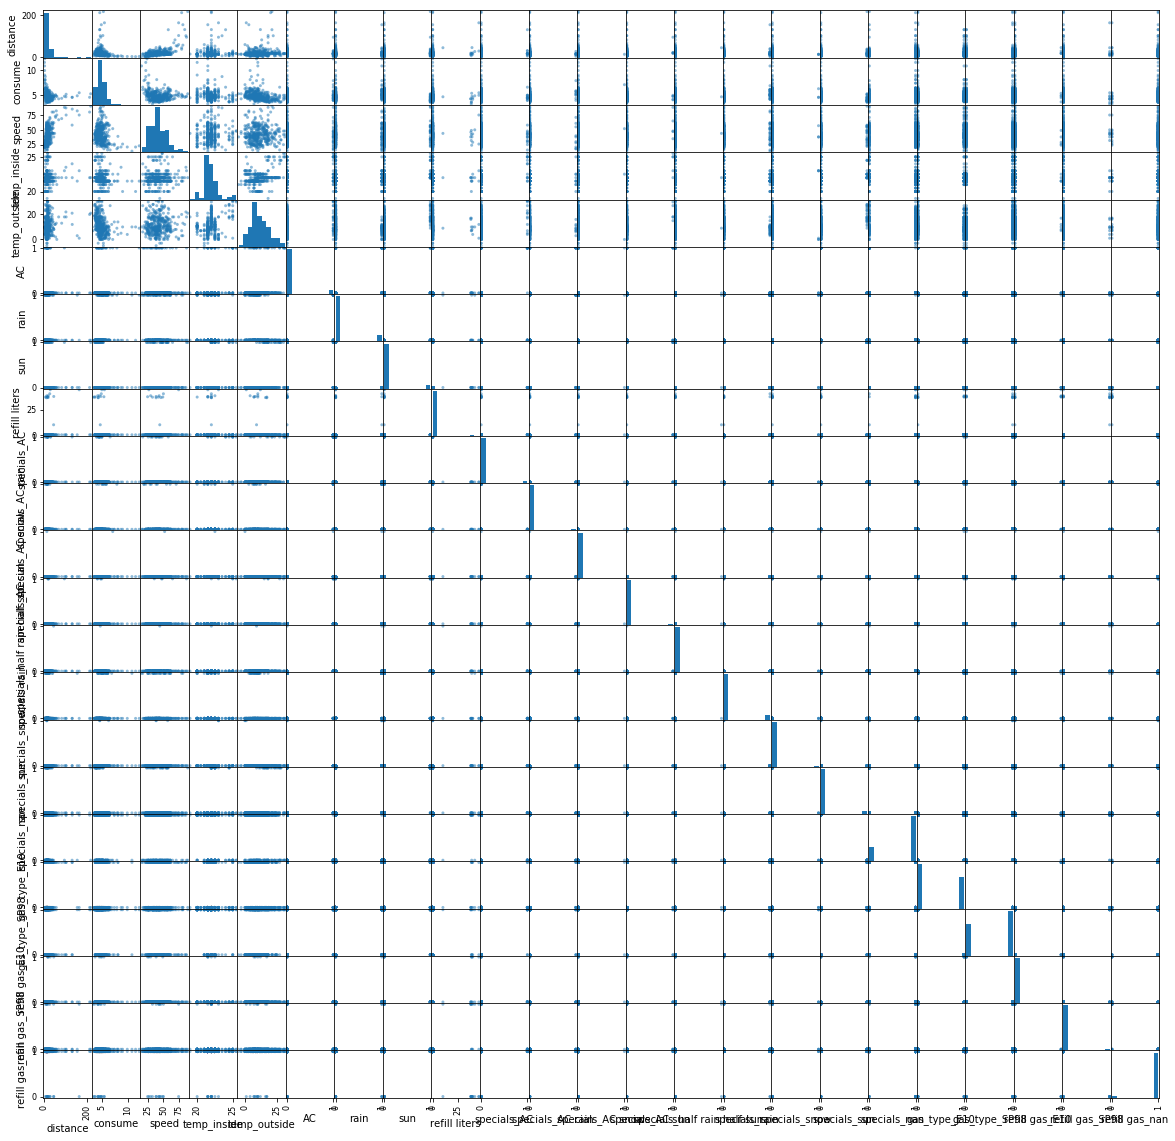

In [23]:
# 散布図行列
pd.plotting.scatter_matrix(dfgus, figsize=(20,20))
plt.show()

In [24]:
# 相関係数を確認
dfgus.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,specials_AC,...,specials_half rain half sun,specials_rain,specials_snow,specials_sun,specials_nan,gas_type_E10,gas_type_SP98,refill gas_E10,refill gas_SP98,refill gas_nan
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,0.107045,0.038373,...,0.053996,0.010723,-0.029320,0.055737,-0.058454,0.053411,-0.053411,0.026079,0.106134,-0.100157
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,-0.074095,-0.042500,...,-0.010462,0.157122,0.021755,-0.168194,-0.020183,0.015327,-0.015327,-0.025731,-0.079080,0.078574
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,-0.007446,-0.060027,...,0.007756,0.038156,0.015635,0.033523,-0.042103,0.097360,-0.097360,-0.073428,0.046177,0.009556
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,-0.021348,0.312831,...,0.003606,-0.068993,0.095124,0.151238,-0.266888,-0.010198,0.010198,-0.014897,-0.017092,0.022834
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.041595,0.235493,...,-0.017168,-0.122726,-0.139378,0.300752,-0.184759,-0.148705,0.148705,-0.009135,-0.043809,0.040320
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,-0.052571,0.616618,...,-0.014715,-0.086790,-0.025553,-0.079168,-0.492968,-0.105285,0.105285,-0.033075,-0.042002,0.053898
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,0.033505,-0.072696,...,0.135289,0.797937,0.234936,-0.102757,-0.650855,-0.060328,0.060328,0.026474,0.055653,-0.060541
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,-0.054448,-0.058007,...,-0.015240,-0.089888,-0.026466,0.912175,-0.533973,-0.022761,0.022761,-0.034256,-0.043501,0.055822
refill liters,0.107045,-0.074095,-0.007446,-0.021348,-0.041595,-0.052571,0.033505,-0.054448,1.000000,-0.035136,...,0.065003,0.053644,-0.016031,-0.049666,0.023497,-0.000741,0.000741,0.640010,0.727194,-0.975377
specials_AC,0.038373,-0.042500,-0.060027,0.312831,0.235493,0.616618,-0.072696,-0.058007,-0.035136,1.000000,...,-0.009835,-0.058007,-0.017079,-0.052912,-0.344586,-0.105929,0.105929,-0.022106,-0.028073,0.036023


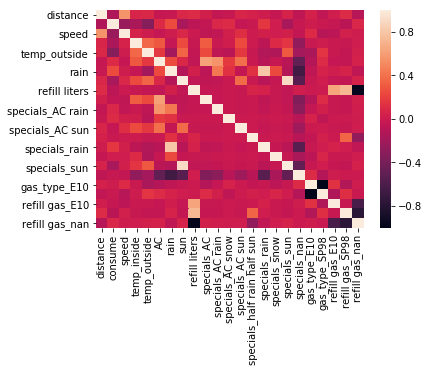

In [25]:
# 相関係数をヒートマップにして可視化
sns.heatmap(dfgus.corr())
plt.show()

## 線形回帰モデルでの学習

### 全ての変数を利用

In [26]:
# 係数を求める
y = dfgus["consume"].values

xcol = dfgus.columns.values

xcol = np.delete(xcol,1)
print(xcol)

X = dfgus[xcol].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

#説明変数の数
exponum = len(xcol)

# 重みを取り出す

w0 = regr.intercept_

#w1 = regr.coef_[0] w2=...
#上記をfor文にする

wall = []
for i in range(exponum):
    wall.append(regr.coef_[i])

['distance' 'speed' 'temp_inside' 'temp_outside' 'AC' 'rain' 'sun'
 'refill liters' 'specials_AC' 'specials_AC rain' 'specials_AC snow'
 'specials_AC sun' 'specials_half rain half sun' 'specials_rain'
 'specials_snow' 'specials_sun' 'specials_nan' 'gas_type_E10'
 'gas_type_SP98' 'refill gas_E10' 'refill gas_SP98' 'refill gas_nan']


In [27]:
#x1 = dfgus['distance'].values x2=...
#上記をfor文にする

xall = []
for i in range(exponum):
    xall.append(dfgus[xcol[i]].values)
    
# 重みと二乗誤差の確認

#y_est = w0 + w1 * x1 + w2 * x2 + w3* x3...
#上記をfor文にする

y_est = w0
for i in range(exponum):
    y_est =  y_est + wall[i] * xall[i]
    
squared_error = 0.5 * np.sum((y - y_est) ** 2)

for i in range(exponum):
    print("W"+ str(i+1) + "=" + str(wall[i]))
    
print('二乗誤差 = {:.3f}'.format(squared_error))

W1=0.0016519299569784356
W2=-0.017546074713512876
W3=-0.06349920896753691
W4=-0.03880916327124826
W5=-0.16460185511135908
W6=7.096105999071824
W7=2.510032099696143
W8=0.13875137891574066
W9=3.885849116875397
W10=-2.951163754129668
W11=-1.3672361405643922
W12=1.6954651233512683
W13=0.9236875190259037
W14=-3.012287972169048
W15=-3.535085714379313
W16=0.8145669763448763
W17=3.5462048456449704
W18=0.009822103433176113
W19=-0.00982210343317363
W20=-1.9538814793271682
W21=-2.0721099755326486
W22=4.025991454859813
二乗誤差 = 140.089


In [28]:
# 値を予測
y_pred = regr.predict(X)

score = regr.score(X, y)
print("score = %s"%round(score,3) ) 

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

score = 0.322
MSE = 0.722
MAE = 0.58
RMSE = 0.85


### 相関が0.2以上の説明変数を選択

In [29]:
# 係数を求める
y = dfgus["consume"].values

X = dfgus[['speed', 'temp_outside','rain', ]].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]

In [30]:
x1 = dfgus['speed'].values
x2 = dfgus['temp_outside'].values
x3 = dfgus['rain'].values

# 重みと二乗誤差の確認
y_est = w0 + w1 * x1 + w2 * x2 + w3* x3

squared_error = 0.5 * np.sum((y - y_est) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f},w3 = {:.3f} '.format(w0, w1, w2, w3))

print('二乗誤差 = {:.3f}'.format(squared_error))

w0 = 6.024, w1 = -0.017, w2 = -0.041,w3 = 0.621 
二乗誤差 = 167.210


In [31]:
# 値を予測
y_pred = regr.predict(X)

score = regr.score(X, y)
print("score = %s"%round(score,3) ) 

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

score = 0.19
MSE = 0.862
MAE = 0.619
RMSE = 0.928


## ホールドアウト法（線形回帰モデル）

In [32]:
df2 = dfgus

# 係数を求める
y = df2["consume"].values

xcol = df2.columns.values

xcol = np.delete(xcol,1)
print(xcol)

X = df2[xcol].values

test_size = 0.2 # 全データのうち、何%をテストデータにするか（今回は20%に設定）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）

regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

['distance' 'speed' 'temp_inside' 'temp_outside' 'AC' 'rain' 'sun'
 'refill liters' 'specials_AC' 'specials_AC rain' 'specials_AC snow'
 'specials_AC sun' 'specials_half rain half sun' 'specials_rain'
 'specials_snow' 'specials_sun' 'specials_nan' 'gas_type_E10'
 'gas_type_SP98' 'refill gas_E10' 'refill gas_SP98' 'refill gas_nan']


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
# 学習用データを使って線形回帰モデルを学習
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)

# 学習用データに対する予測を実行
y_pred_train = regr.predict(X_train)

# 学習データに対するMAEを計算（訓練誤差の評価）
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE = %s"%round(mae,3) )

MAE = 0.566


In [34]:
# テストデータに対する予測を実行
y_pred_test = regr.predict(X_test)

# テストデータに対するMAEを計算（汎化誤差の評価）
mae = mean_absolute_error(y_test, y_pred_test)
print("MAE = %s"%round(mae,3) )

MAE = 0.656


## 交差検証（クロスバリデーション）法（線形回帰モデル）

In [35]:
df3 = dfgus
# 係数を求める
y = df3["consume"].values

xcol = df3.columns.values

xcol = np.delete(xcol,1)
print(xcol)

X = df3[xcol].values

n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mae = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
    # 学習用データを使って線形回帰モデルを学習
    regr = LinearRegression(fit_intercept=False)
    regr.fit(X_train, y_train)

    # テストデータに対する予測を実行
    y_pred_test = regr.predict(X_test)
    
    # テストデータに対するMAEを計算
    mae = mean_absolute_error(y_test, y_pred_test)
    print("Fold %s"%split_num)
    print("MAE = %s"%round(mae, 3))
    print()
    
    cross_valid_mae += mae #後で平均を取るためにMAEを加算
    split_num += 1

# MAEの平均値を最終的な汎化誤差値とする
final_mae = cross_valid_mae / n_split
print("Cross Validation MAE = %s"%round(final_mae, 3))

['distance' 'speed' 'temp_inside' 'temp_outside' 'AC' 'rain' 'sun'
 'refill liters' 'specials_AC' 'specials_AC rain' 'specials_AC snow'
 'specials_AC sun' 'specials_half rain half sun' 'specials_rain'
 'specials_snow' 'specials_sun' 'specials_nan' 'gas_type_E10'
 'gas_type_SP98' 'refill gas_E10' 'refill gas_SP98' 'refill gas_nan']
Fold 1
MAE = 0.701

Fold 2
MAE = 0.767

Fold 3
MAE = 0.619

Fold 4
MAE = 0.569

Fold 5
MAE = 0.639

Cross Validation MAE = 0.659


## 多項式回帰モデル

In [36]:
degrees = [0, 1, 2, 3, 4, 5, 6]#degreeの値を指定する

df4 = dfgus
# 係数を求める
y = df4["consume"].values

xcol = df4.columns.values

xcol = np.delete(xcol,1)
print(xcol)

X = df4[xcol].values

for degree in degrees:
    regr = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    regr.fit(X, y)

    # 値を予測
    y_pred = regr.predict(X)

    score = regr.score(X, y)

    print("degree=" + str(degree))
    print("score = %s"%round(score,3) ) 

    # MSEを計算
    mse = mean_squared_error(y, y_pred) 
    print("MSE = %s"%round(mse,3) )  

    # MAEを計算
    mae = mean_absolute_error(y, y_pred) 
    print("MAE = %s"%round(mae,3) )

    # RMSEを計算
    rmse = np.sqrt(mse)
    print("RMSE = %s"%round(rmse, 3) )

['distance' 'speed' 'temp_inside' 'temp_outside' 'AC' 'rain' 'sun'
 'refill liters' 'specials_AC' 'specials_AC rain' 'specials_AC snow'
 'specials_AC sun' 'specials_half rain half sun' 'specials_rain'
 'specials_snow' 'specials_sun' 'specials_nan' 'gas_type_E10'
 'gas_type_SP98' 'refill gas_E10' 'refill gas_SP98' 'refill gas_nan']
degree=0
score = 0.0
MSE = 1.065
MAE = 0.676
RMSE = 1.032
degree=1
score = 0.322
MSE = 0.722
MAE = 0.58
RMSE = 0.85
degree=2
score = 0.559
MSE = 0.47
MAE = 0.487
RMSE = 0.685
degree=3
score = 0.734
MSE = 0.283
MAE = 0.375
RMSE = 0.532
degree=4
score = 0.854
MSE = 0.155
MAE = 0.244
RMSE = 0.394
degree=5
score = 0.934
MSE = 0.071
MAE = 0.151
RMSE = 0.266
degree=6
score = 0.993
MSE = 0.008
MAE = 0.034
RMSE = 0.087


### あらたな特徴量の模索

In [37]:
dfn = dfgus

In [38]:
dfn.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,specials_AC,...,specials_half rain half sun,specials_rain,specials_snow,specials_sun,specials_nan,gas_type_E10,gas_type_SP98,refill gas_E10,refill gas_SP98,refill gas_nan
0,28.0,5.0,26,21.5,12,0,0,0,45.0,0,...,0,0,0,0,1,1,0,1,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0.0,0,...,0,0,0,0,1,1,0,0,0,1
2,11.2,5.5,38,21.5,15,0,0,0,0.0,0,...,0,0,0,0,1,1,0,0,0,1
3,12.9,3.9,36,21.5,14,0,0,0,0.0,0,...,0,0,0,0,1,1,0,0,0,1
4,18.5,4.5,46,21.5,15,0,0,0,0.0,0,...,0,0,0,0,1,1,0,0,0,1


In [39]:
dfn["tempdif"] = dfn["temp_inside"] - dfn["temp_outside"]

In [40]:
dfn["time"] = dfn["distance"] / dfn["speed"]

In [41]:
dfn.loc[dfn.AC > 0,['tempdif','AC']]

,tempdif,AC
40,14.5,1
41,14.5,1
60,12.5,1
61,12.5,1
69,17.5,1
94,11.0,1
101,13.0,1
104,10.0,1
153,15.5,1
181,22.5,1


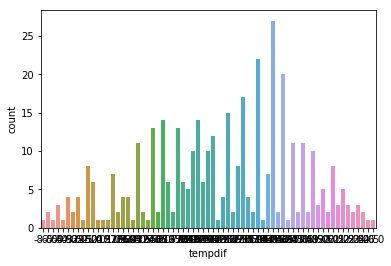

In [42]:
sns.countplot(x="tempdif",data=dfn)

In [43]:
dfn.tempdif.value_counts()

 14.500000    27
 13.500000    22
 15.500000    20
 12.500000    17
 11.500000    15
 6.000000     14
 9.000000     14
 5.000000     13
 7.000000     13
 10.500000    12
 16.500000    11
 4.000000     11
 17.500000    11
 8.500000     10
 18.500000    10
 10.000000    10
 20.500000     8
-2.000000      8
 12.000000     8
 14.000000     7
 1.000000      7
 7.500000      6
-1.000000      6
 9.500000      6
 6.500000      6
 8.000000      5
 19.500000     5
 21.500000     5
 11.000000     4
 2.000000      4
              ..
 23.000000     3
 19.000000     3
 20.000000     2
 13.000000     2
 11.929521     2
 17.000000     2
 24.000000     2
 4.500000      2
 18.000000     2
 6.929521      2
 22.500000     2
 5.500000      2
 1.500000      2
 15.000000     2
-6.000000      2
-3.500000      2
-8.000000      1
 0.929521      1
 13.929521     1
 4.929521      1
-2.500000      1
 0.500000      1
-5.500000      1
-4.500000      1
 0.000000      1
 16.000000     1
 26.000000     1
 10.929521    

In [44]:
dfn["NewAC"] = dfn["AC"]

In [45]:
# 相関係数を確認
dfn.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,specials_AC,...,specials_sun,specials_nan,gas_type_E10,gas_type_SP98,refill gas_E10,refill gas_SP98,refill gas_nan,tempdif,time,NewAC
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,0.107045,0.038373,...,0.055737,-0.058454,0.053411,-0.053411,0.026079,0.106134,-0.100157,-0.080869,0.884942,-0.025738
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,-0.074095,-0.042500,...,-0.168194,-0.020183,0.015327,-0.015327,-0.025731,-0.079080,0.078574,0.310991,-0.177825,0.096591
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,-0.007446,-0.060027,...,0.033523,-0.042103,0.097360,-0.097360,-0.073428,0.046177,0.009556,-0.007281,0.245061,-0.035408
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,-0.021348,0.312831,...,0.151238,-0.266888,-0.010198,0.010198,-0.014897,-0.017092,0.022834,-0.226734,0.067038,0.297376
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.041595,0.235493,...,0.300752,-0.184759,-0.148705,0.148705,-0.009135,-0.043809,0.040320,-0.990354,0.107179,0.167562
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,-0.052571,0.616618,...,-0.079168,-0.492968,-0.105285,0.105285,-0.033075,-0.042002,0.053898,-0.130734,-0.009260,1.000000
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,0.033505,-0.072696,...,-0.102757,-0.650855,-0.060328,0.060328,0.026474,0.055653,-0.060541,0.188979,-0.027300,0.242915
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,-0.054448,-0.058007,...,0.912175,-0.533973,-0.022761,0.022761,-0.034256,-0.043501,0.055822,-0.326104,0.058150,0.088598
refill liters,0.107045,-0.074095,-0.007446,-0.021348,-0.041595,-0.052571,0.033505,-0.054448,1.000000,-0.035136,...,-0.049666,0.023497,-0.000741,0.000741,0.640010,0.727194,-0.975377,0.040244,0.150026,-0.052571
specials_AC,0.038373,-0.042500,-0.060027,0.312831,0.235493,0.616618,-0.072696,-0.058007,-0.035136,1.000000,...,-0.052912,-0.344586,-0.105929,0.105929,-0.022106,-0.028073,0.036023,-0.199341,0.094857,0.616618


In [46]:
dfn.loc[dfn.AC > 0,['rain','AC']]

,rain,AC
40,1,1
41,0,1
60,1,1
61,1,1
69,0,1
94,1,1
101,1,1
104,1,1
153,1,1
181,1,1


In [47]:
dfn.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'AC',
       'rain', 'sun', 'refill liters', 'specials_AC', 'specials_AC rain',
       'specials_AC snow', 'specials_AC sun', 'specials_half rain half sun',
       'specials_rain', 'specials_snow', 'specials_sun', 'specials_nan',
       'gas_type_E10', 'gas_type_SP98', 'refill gas_E10', 'refill gas_SP98',
       'refill gas_nan', 'tempdif', 'time', 'NewAC'],
      dtype='object')

In [52]:
#温度差が10度以上や雨、雪が降ってたり他のACが１の時、NewACに1を立てる
dfn.loc[dfn['tempdif'] >= 10, 'NewAC'] = 1
dfn.loc[dfn['rain'] > 0, 'NewAC'] = 1
dfn.loc[dfn['specials_AC'] > 0, 'NewAC'] = 1
dfn.loc[dfn["specials_AC rain"] > 0, 'NewAC'] = 1
dfn.loc[dfn["specials_AC snow"] > 0, 'NewAC'] = 1
dfn.loc[dfn["specials_AC sun"] > 0, 'NewAC'] = 1
dfn.loc[dfn["specials_half rain half sun"] > 0, 'NewAC'] = 1
dfn.loc[dfn["specials_rain"] > 0, 'NewAC'] = 1
dfn.loc[dfn["specials_snow"] > 0, 'NewAC'] = 1

In [53]:
# 相関係数を確認
dfn.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,specials_AC,...,specials_sun,specials_nan,gas_type_E10,gas_type_SP98,refill gas_E10,refill gas_SP98,refill gas_nan,tempdif,time,NewAC
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,0.107045,0.038373,...,0.055737,-0.058454,0.053411,-0.053411,0.026079,0.106134,-0.100157,-0.080869,0.884942,-0.074311
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,-0.074095,-0.042500,...,-0.168194,-0.020183,0.015327,-0.015327,-0.025731,-0.079080,0.078574,0.310991,-0.177825,0.311981
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,-0.007446,-0.060027,...,0.033523,-0.042103,0.097360,-0.097360,-0.073428,0.046177,0.009556,-0.007281,0.245061,-0.063090
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,-0.021348,0.312831,...,0.151238,-0.266888,-0.010198,0.010198,-0.014897,-0.017092,0.022834,-0.226734,0.067038,-0.072600
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.041595,0.235493,...,0.300752,-0.184759,-0.148705,0.148705,-0.009135,-0.043809,0.040320,-0.990354,0.107179,-0.677252
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,-0.052571,0.616618,...,-0.079168,-0.492968,-0.105285,0.105285,-0.033075,-0.042002,0.053898,-0.130734,-0.009260,0.213866
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,0.033505,-0.072696,...,-0.102757,-0.650855,-0.060328,0.060328,0.026474,0.055653,-0.060541,0.188979,-0.027300,0.277590
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,-0.054448,-0.058007,...,0.912175,-0.533973,-0.022761,0.022761,-0.034256,-0.043501,0.055822,-0.326104,0.058150,-0.248985
refill liters,0.107045,-0.074095,-0.007446,-0.021348,-0.041595,-0.052571,0.033505,-0.054448,1.000000,-0.035136,...,-0.049666,0.023497,-0.000741,0.000741,0.640010,0.727194,-0.975377,0.040244,0.150026,0.010606
specials_AC,0.038373,-0.042500,-0.060027,0.312831,0.235493,0.616618,-0.072696,-0.058007,-0.035136,1.000000,...,-0.052912,-0.344586,-0.105929,0.105929,-0.022106,-0.028073,0.036023,-0.199341,0.094857,0.142939


In [57]:
dfn.loc[dfn["refill liters"] > 0,['distance','refill liters', 'time']]

,distance,refill liters,time
0,28.0,45.0,1.076923
44,5.4,37.6,0.168750
82,10.5,37.7,0.250000
106,162.7,45.0,2.169333
139,16.1,38.0,0.670833
171,44.4,38.3,1.168421
191,43.7,10.0,0.993182
192,12.1,39.0,0.281395
234,19.0,39.0,0.655172
274,25.7,41.0,0.514000


## 新たなデータで線形回帰モデルを試す

In [60]:
dfn.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'AC',
       'rain', 'sun', 'refill liters', 'specials_AC', 'specials_AC rain',
       'specials_AC snow', 'specials_AC sun', 'specials_half rain half sun',
       'specials_rain', 'specials_snow', 'specials_sun', 'specials_nan',
       'gas_type_E10', 'gas_type_SP98', 'refill gas_E10', 'refill gas_SP98',
       'refill gas_nan', 'tempdif', 'time', 'NewAC'],
      dtype='object')

In [61]:
# 係数を求める
y = dfn["consume"].values

xcol = dfn.columns.values

xcol = np.delete(xcol,1)
print(xcol)

X = dfn[xcol].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

#説明変数の数
exponum = len(xcol)

# 重みを取り出す

w0 = regr.intercept_

#w1 = regr.coef_[0] w2=...
#上記をfor文にする

wall = []
for i in range(exponum):
    wall.append(regr.coef_[i])

['distance' 'speed' 'temp_inside' 'temp_outside' 'AC' 'rain' 'sun'
 'refill liters' 'specials_AC' 'specials_AC rain' 'specials_AC snow'
 'specials_AC sun' 'specials_half rain half sun' 'specials_rain'
 'specials_snow' 'specials_sun' 'specials_nan' 'gas_type_E10'
 'gas_type_SP98' 'refill gas_E10' 'refill gas_SP98' 'refill gas_nan'
 'tempdif' 'time' 'NewAC']


In [62]:
#x1 = dfgus['distance'].values x2=...
#上記をfor文にする

xall = []
for i in range(exponum):
    xall.append(dfgus[xcol[i]].values)
    
# 重みと二乗誤差の確認

#y_est = w0 + w1 * x1 + w2 * x2 + w3* x3...
#上記をfor文にする

y_est = w0
for i in range(exponum):
    y_est =  y_est + wall[i] * xall[i]
    
squared_error = 0.5 * np.sum((y - y_est) ** 2)

for i in range(exponum):
    print("W"+ str(i+1) + "=" + str(wall[i]))
    
print('二乗誤差 = {:.3f}'.format(squared_error))

W1=0.04680190076163249
W2=-0.0418984021608768
W3=-0.06481955916200706
W4=-0.043071698675567094
W5=-1.0213442147841083
W6=7.121906333517963
W7=2.2947315399132697
W8=0.1998465621011247
W9=3.9845871713508356
W10=-2.8329382396978624
W11=-1.1574070449978868
W12=1.8921070580419441
W13=2.77441087609621
W14=-3.7632734453039736
W15=-4.194264209791392
W16=0.4026244818713198
W17=2.8941533524307808
W18=0.017345748845535067
W19=-0.01734574884553805
W20=-2.308616165318041
W21=-3.1579247273575928
W22=5.466540892675637
W23=-0.021747860486528377
W24=-3.1039811370435957
W25=0.28357580115519027
二乗誤差 = 119.173


In [63]:
# 値を予測
y_pred = regr.predict(X)

score = regr.score(X, y)
print("score = %s"%round(score,3) ) 

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

score = 0.423
MSE = 0.614
MAE = 0.554
RMSE = 0.784


## まとめ
